In [221]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN, OPTICS

# 1.轮廓系数
# 对于不正确的 clustering （聚类），分数为 -1 ， highly dense clustering （高密度聚类）为 +1 。
# 零点附近的分数表示 overlapping clusters （重叠的聚类）。
# silhouette_score()计算所有点的平均轮廓系数，而silhouette_samples()返回每个点的轮廓系数。
from sklearn.metrics.cluster import silhouette_score, silhouette_samples
# 2.CH分数,结果越大,评估越好
from sklearn.metrics.cluster import calinski_harabasz_score
# 3.戴维森堡丁指数 值最小是0，值越小，代表聚类效果越好
from sklearn.metrics.cluster import davies_bouldin_score
# 4.需要label_ture,结果在0~1之间,越接近1越好
# 返回 homogeneity, completeness, v_measure(Harmonic mean of the first two)
from sklearn.metrics.cluster import homogeneity_completeness_v_measure

import matplotlib.pyplot as plt

# 创建数据集
https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py

In [222]:
n_samples = 1500
blobs_x, blobs_y = datasets.make_blobs(n_samples=n_samples, n_features=2, centers=4, random_state=0)
# 大圆套小圆
circles_x, circles_y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=0)
# 生成两个半圆
moons_x, moons_y = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=0)

## 展示数据

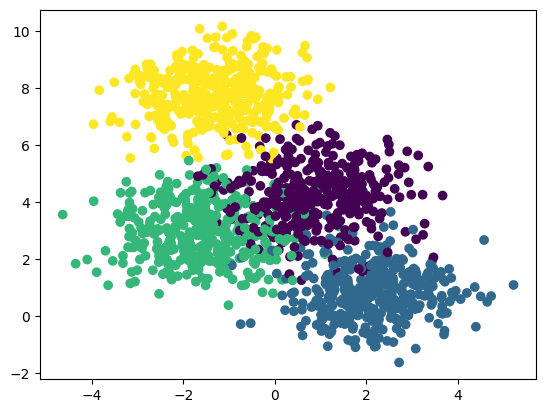

In [223]:
plt.scatter(blobs_x[:, 0], blobs_x[:, 1], c=blobs_y)

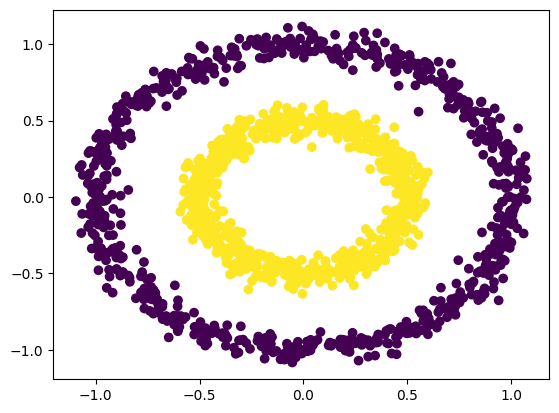

In [224]:
plt.scatter(circles_x[:, 0], circles_x[:, 1], c=circles_y)

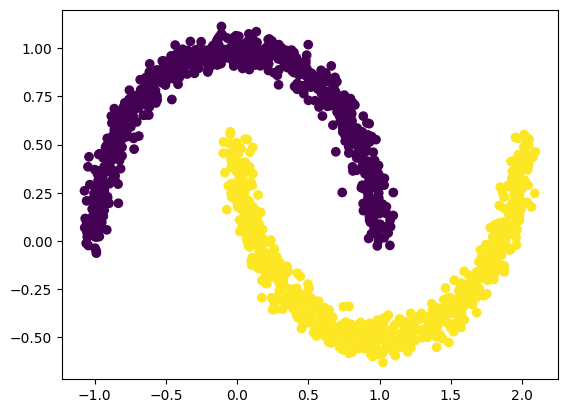

In [225]:
plt.scatter(moons_x[:, 0], moons_x[:, 1], c=moons_y)

## score得分函数

In [275]:
def get_score(x, y, pred_y: list):
    print("silhouette_score, bigger is better")
    for y_ in pred_y:
        print(silhouette_score(x, y_))
    print()

    print("calinski_harabasz_score, bigger is better")
    for y_ in pred_y:
        print(calinski_harabasz_score(x, y_))
    print()

    print("davies_bouldin_score, smaller is better")
    for y_ in pred_y:
        print(davies_bouldin_score(x, y_))
    print()

    print("homogeneity_completeness_v_measure, bigger is better")
    for y_ in pred_y:
        print(homogeneity_completeness_v_measure(y, y_))

# 聚类

## blobs

### KMeans

In [226]:
#                               4种类别
kmeans_blobs = KMeans(n_clusters=4, random_state=0)

In [227]:
kmeans_blobs_y_pred = kmeans_blobs.fit_predict(blobs_x)

d:\Miniconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


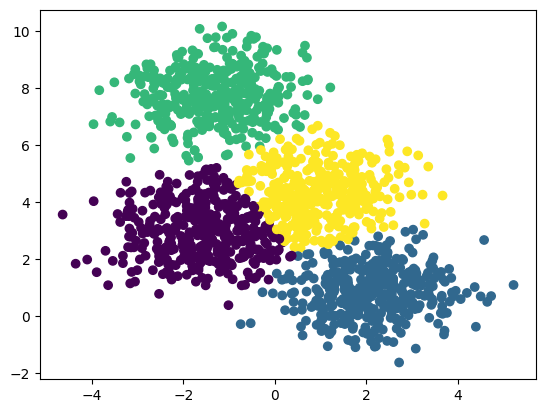

In [228]:
plt.scatter(blobs_x[:, 0], blobs_x[:, 1], c=kmeans_blobs_y_pred)

### DBSCAN
(Density-Based Spatial Clustering of Applications with Noise) 基于密度的聚类算法

In [229]:
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
dbscan_blobs = DBSCAN(eps=0.3)

In [230]:
dbscan_blobs_y_pred = dbscan_blobs.fit_predict(blobs_x)

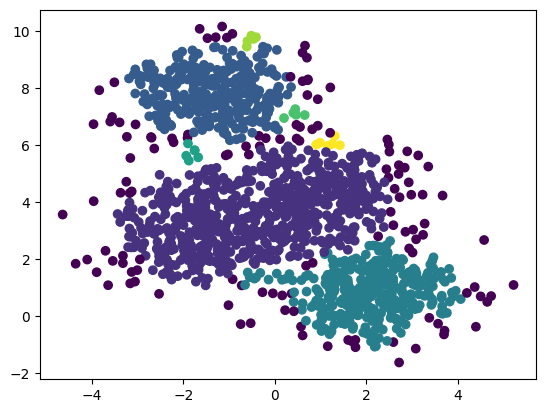

In [231]:
plt.scatter(blobs_x[:, 0], blobs_x[:, 1], c=dbscan_blobs_y_pred)

### OPTICS
OPTICS : A similar clustering at multiple values of eps. Our implementation is optimized for memory usage.

In [232]:
# min_cluster_size: Minimum number of samples in an OPTICS cluster, expressed as
# an absolute number or a fraction of the number of samples (rounded to be at least 2)
# 小数: 一个类别至少占总数的比例
# 整数: 一个类别至少的个数
optics_blobs = OPTICS(min_cluster_size=0.24)

In [233]:
optics_blobs_y_pred = optics_blobs.fit_predict(blobs_x)

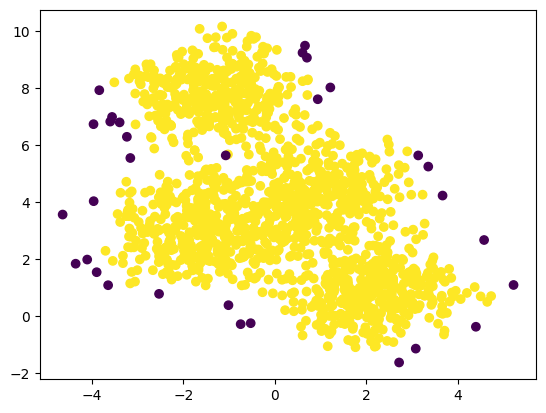

In [234]:
plt.scatter(blobs_x[:, 0], blobs_x[:, 1], c=optics_blobs_y_pred)

### score

In [276]:
get_score(blobs_x, blobs_y, [kmeans_blobs_y_pred, dbscan_blobs_y_pred, optics_blobs_y_pred])

silhouette_score, bigger is better
0.508614216804456
0.10998969550058921
0.2332041402894007

calinski_harabasz_score, bigger is better
2634.7086515460765
435.17731475509754
1.494850794154258

davies_bouldin_score, smaller is better
0.6950536918882211
2.94520800022368
10.195668314135732

homogeneity_completeness_v_measure, bigger is better
(0.7990860926862009, 0.7993712592378472, 0.7992286505250106)
(0.5880441405948398, 0.6196228251677509, 0.6034206152002101)
(0.0016772514706599139, 0.023107809463511934, 0.0031274974477039337)


## circles

### KMeans

In [239]:
#                                  2种类别
kmeans_circles = KMeans(n_clusters=2, random_state=0)

In [240]:
kmeans_circles_y_pred = kmeans_circles.fit_predict(circles_x)

d:\Miniconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


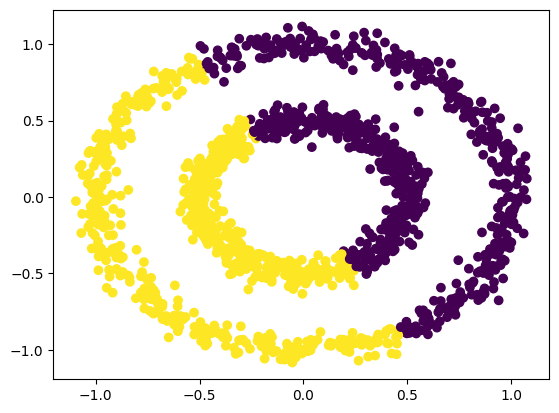

In [241]:
plt.scatter(circles_x[:, 0], circles_x[:, 1], c=kmeans_circles_y_pred)

### DBSCAN
(Density-Based Spatial Clustering of Applications with Noise) 基于密度的聚类算法

In [242]:
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
dbscan_circles = DBSCAN(eps=0.15)

In [243]:
dbscan_circles_y_pred = dbscan_circles.fit_predict(circles_x)

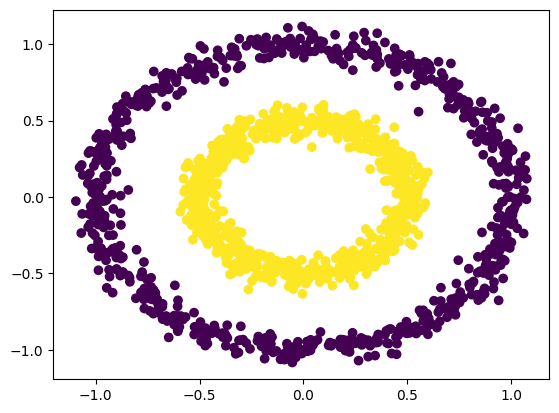

In [244]:
plt.scatter(circles_x[:, 0], circles_x[:, 1], c=dbscan_circles_y_pred)

### OPTICS
OPTICS : A similar clustering at multiple values of eps. Our implementation is optimized for memory usage.

In [245]:
# min_cluster_size: Minimum number of samples in an OPTICS cluster, expressed as
# an absolute number or a fraction of the number of samples (rounded to be at least 2)
# 小数: 一个类别至少占总数的比例
# 整数: 一个类别至少的个数
optics_circles = OPTICS(min_cluster_size=0.3)

In [246]:
optics_circles_y_pred = optics_circles.fit_predict(circles_x)

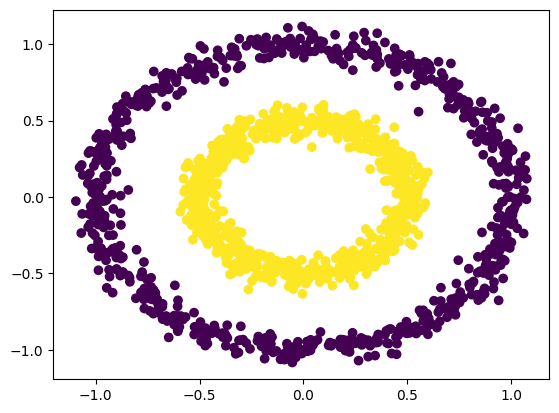

In [247]:
plt.scatter(circles_x[:, 0], circles_x[:, 1], c=optics_circles_y_pred)

### score

In [277]:
get_score(circles_x, circles_y, [kmeans_circles_y_pred, dbscan_circles_y_pred, optics_circles_y_pred])

silhouette_score, bigger is better
0.35460052655173707
0.11397816414100963
0.11397816414100963

calinski_harabasz_score, bigger is better
865.4110403299605
0.0013722701365677682
0.0013722701365677682

davies_bouldin_score, smaller is better
1.1815946772668477
989.6898942666963
989.6898942666963

homogeneity_completeness_v_measure, bigger is better
(5.130172150268185e-06, 5.130593243063725e-06, 5.130382688025316e-06)
(1.0, 1.0, 1.0)
(1.0, 1.0, 1.0)


## moons

### KMeans

In [252]:
#                                  2种类别
kmeans_moons = KMeans(n_clusters=2, random_state=0)

In [253]:
kmeans_moons_y_pred = kmeans_moons.fit_predict(moons_x)

d:\Miniconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


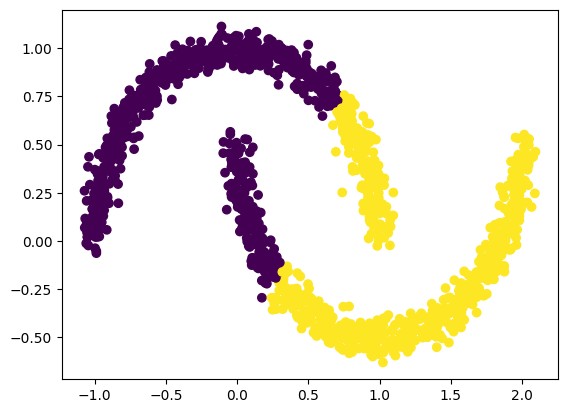

In [254]:
plt.scatter(moons_x[:, 0], moons_x[:, 1], c=kmeans_moons_y_pred)

### DBSCAN
(Density-Based Spatial Clustering of Applications with Noise) 基于密度的聚类算法

In [255]:
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
dbscan_moons = DBSCAN(eps=0.14)

In [256]:
dbscan_moons_y_pred = dbscan_moons.fit_predict(moons_x)

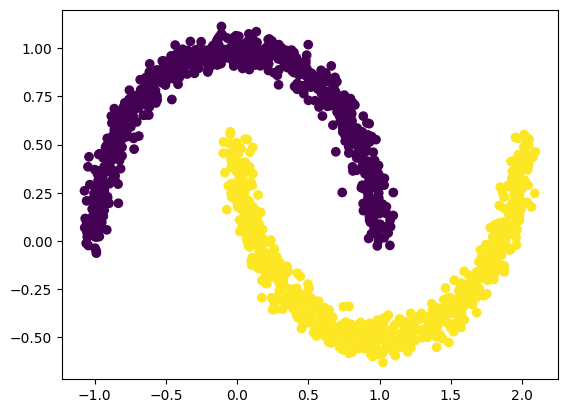

In [257]:
plt.scatter(moons_x[:, 0], moons_x[:, 1], c=dbscan_moons_y_pred)

### OPTICS

In [258]:
# min_cluster_size: Minimum number of samples in an OPTICS cluster, expressed as
# an absolute number or a fraction of the number of samples (rounded to be at least 2)
# 小数: 一个类别至少占总数的比例
# 整数: 一个类别至少的个数
optics_moons = OPTICS(min_cluster_size=0.3)

In [259]:
optics_moons_y_pred = optics_moons.fit_predict(moons_x)

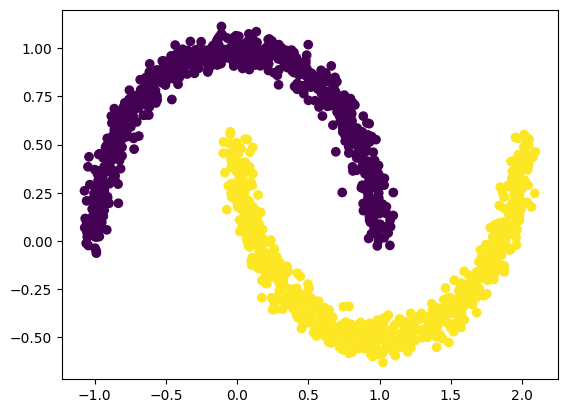

In [260]:
plt.scatter(moons_x[:, 0], moons_x[:, 1], c=optics_moons_y_pred)

### score

In [278]:
get_score(moons_x, moons_y, [kmeans_moons_y_pred, dbscan_moons_y_pred, optics_moons_y_pred])

silhouette_score, bigger is better
0.491435882702386
0.3360087132353015
0.3360087132353015

calinski_harabasz_score, bigger is better
2226.800466131634
998.513504365451
998.513504365451

davies_bouldin_score, smaller is better
0.7804628942008482
1.1511272102975316
1.1511272102975316

homogeneity_completeness_v_measure, bigger is better
(0.19191420381460828, 0.19191814167293897, 0.19191617272357375)
(1.0, 1.0, 1.0)
(1.0, 1.0, 1.0)
